In [2]:
# import relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import dataset
data = pd.read_csv('../data/merged_dataframe.csv')
data.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
0,Denmark,192.67,100.88,74.90,80.00,28.85,21.33,81.80,58.57,123.0,85.3,87.0,135,27072.0,7.6456
1,Switzerland,192.01,119.53,78.40,72.44,29.09,22.39,79.24,87.89,125.0,76.6,85.0,208,52646.0,7.5599
2,Finland,190.22,99.93,76.68,75.79,29.90,11.55,58.87,49.18,124.0,80.2,86.0,16,9743.0,7.8087
3,Australia,186.21,107.31,58.64,77.38,34.73,23.46,92.70,55.04,125.0,81.2,77.0,3,27055.0,7.2228
4,Netherlands,183.67,90.73,72.38,74.65,29.43,27.41,87.61,55.30,123.0,76.1,82.0,420,114540.0,7.4489


In [4]:
# check for missing values
data.isna().sum()

Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Cost of Living Plus Rent Index    0
Passport Index                    4
Ease of Doing Business Index      8
Corruption Index                  3
Population Density                2
Current Covid Cases               6
Happiness Score                   6
dtype: int64

In [5]:
# since Happiness Score is the target feature I want to axamine, I eliminate those NaN
data = data.dropna(subset=['Happiness Score'])
data

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
0,Denmark,192.67,100.88,74.90,80.00,28.85,21.33,81.80,58.57,123.0,85.3,87.0,135,27072.0,7.6456
1,Switzerland,192.01,119.53,78.40,72.44,29.09,22.39,79.24,87.89,125.0,76.6,85.0,208,52646.0,7.5599
2,Finland,190.22,99.93,76.68,75.79,29.90,11.55,58.87,49.18,124.0,80.2,86.0,16,9743.0,7.8087
3,Australia,186.21,107.31,58.64,77.38,34.73,23.46,92.70,55.04,125.0,81.2,77.0,3,27055.0,7.2228
4,Netherlands,183.67,90.73,72.38,74.65,29.43,27.41,87.61,55.30,123.0,76.1,82.0,420,114540.0,7.4489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Sri Lanka,85.16,24.45,59.78,72.53,59.01,59.14,59.11,20.20,44.0,61.8,38.0,332,3363.0,4.3270
76,Iran,74.14,22.69,50.75,51.70,48.01,77.45,70.99,27.28,36.0,NaN,26.0,51,449960.0,4.6724
77,Kenya,70.56,27.32,38.34,55.59,56.65,76.60,99.79,26.11,59.0,73.2,28.0,82,38168.0,4.5830
78,Bangladesh,70.03,33.21,36.06,42.80,56.73,86.21,71.29,19.22,42.0,45.0,26.0,"1,169",360555.0,4.8328


In [6]:
# just double-check successful dropping missing values in Happiness Score
data['Happiness Score'].isna().sum()

0

In [7]:
# columns with remaining missing values --> deal with them later in case needed
data.isna().sum()

Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Cost of Living Plus Rent Index    0
Passport Index                    3
Ease of Doing Business Index      5
Corruption Index                  2
Population Density                1
Current Covid Cases               5
Happiness Score                   0
dtype: int64

In [8]:
# get first numerical statistics
data.describe()

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Current Covid Cases,Happiness Score
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,71.000000,69.000000,72.000000,6.900000e+01,74.000000
mean,134.108378,59.154730,59.959865,64.788649,36.472297,52.510946,77.837432,36.719054,94.338028,73.665217,53.555556,3.365582e+05,6.043559
std,34.522436,27.071215,13.354163,9.667807,8.214578,21.061553,16.399976,15.634666,31.033136,8.285402,19.024735,9.317664e+05,0.953180
min,55.650000,13.520000,22.510000,42.800000,20.100000,11.550000,20.220000,13.660000,36.000000,45.000000,26.000000,1.077000e+03,3.573300
25%,106.012500,35.607500,52.967500,56.615000,30.235000,33.795000,68.970000,24.807500,64.500000,69.800000,37.750000,1.624500e+04,5.414400
50%,132.755000,53.390000,59.600000,66.100000,35.610000,55.305000,79.215000,31.645000,110.000000,75.700000,49.000000,8.538400e+04,6.080000
75%,161.887500,84.502500,70.685000,72.507500,39.810000,67.152500,91.910000,49.330000,123.000000,79.600000,71.500000,3.072880e+05,6.759050
max,192.670000,119.530000,84.300000,81.970000,61.080000,88.370000,99.790000,87.890000,126.000000,86.800000,87.000000,6.145291e+06,7.808700


In [9]:
# Since feature population density is disappeared, it is apparently not recognized as numeric 
# therefore check data type
data.dtypes

Country                            object
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                     float64
Cost of Living Plus Rent Index    float64
Passport Index                    float64
Ease of Doing Business Index      float64
Corruption Index                  float64
Population Density                 object
Current Covid Cases               float64
Happiness Score                   float64
dtype: object

In [10]:
# convert Population density from str to float
data['Population Density'] = data['Population Density'].str.replace(',', '').astype(float)

In [11]:
data

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
0,Denmark,192.67,100.88,74.90,80.00,28.85,21.33,81.80,58.57,123.0,85.3,87.0,135.0,27072.0,7.6456
1,Switzerland,192.01,119.53,78.40,72.44,29.09,22.39,79.24,87.89,125.0,76.6,85.0,208.0,52646.0,7.5599
2,Finland,190.22,99.93,76.68,75.79,29.90,11.55,58.87,49.18,124.0,80.2,86.0,16.0,9743.0,7.8087
3,Australia,186.21,107.31,58.64,77.38,34.73,23.46,92.70,55.04,125.0,81.2,77.0,3.0,27055.0,7.2228
4,Netherlands,183.67,90.73,72.38,74.65,29.43,27.41,87.61,55.30,123.0,76.1,82.0,420.0,114540.0,7.4489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Sri Lanka,85.16,24.45,59.78,72.53,59.01,59.14,59.11,20.20,44.0,61.8,38.0,332.0,3363.0,4.3270
76,Iran,74.14,22.69,50.75,51.70,48.01,77.45,70.99,27.28,36.0,NaN,26.0,51.0,449960.0,4.6724
77,Kenya,70.56,27.32,38.34,55.59,56.65,76.60,99.79,26.11,59.0,73.2,28.0,82.0,38168.0,4.5830
78,Bangladesh,70.03,33.21,36.06,42.80,56.73,86.21,71.29,19.22,42.0,45.0,26.0,1169.0,360555.0,4.8328


In [12]:
# all data are now numeric
data.describe()

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,71.000000,69.000000,72.000000,73.000000,6.900000e+01,74.000000
mean,134.108378,59.154730,59.959865,64.788649,36.472297,52.510946,77.837432,36.719054,94.338028,73.665217,53.555556,254.102740,3.365582e+05,6.043559
std,34.522436,27.071215,13.354163,9.667807,8.214578,21.061553,16.399976,15.634666,31.033136,8.285402,19.024735,924.488608,9.317664e+05,0.953180
min,55.650000,13.520000,22.510000,42.800000,20.100000,11.550000,20.220000,13.660000,36.000000,45.000000,26.000000,3.000000,1.077000e+03,3.573300
25%,106.012500,35.607500,52.967500,56.615000,30.235000,33.795000,68.970000,24.807500,64.500000,69.800000,37.750000,43.000000,1.624500e+04,5.414400
50%,132.755000,53.390000,59.600000,66.100000,35.610000,55.305000,79.215000,31.645000,110.000000,75.700000,49.000000,99.000000,8.538400e+04,6.080000
75%,161.887500,84.502500,70.685000,72.507500,39.810000,67.152500,91.910000,49.330000,123.000000,79.600000,71.500000,200.000000,3.072880e+05,6.759050
max,192.670000,119.530000,84.300000,81.970000,61.080000,88.370000,99.790000,87.890000,126.000000,86.800000,87.000000,7894.000000,6.145291e+06,7.808700


In [14]:
# get overview about all correlations
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
Quality of Life Index,1.00,0.85,0.62,0.63,-0.77,-0.91,0.09,0.72,0.83,0.67,0.89,-0.01,-0.19,0.78
Purchasing Power Index,0.85,1.00,0.44,0.60,-0.54,-0.72,-0.12,0.81,0.65,0.61,0.85,0.12,-0.12,0.74
Safety Index,0.62,0.44,1.00,0.34,-0.59,-0.50,-0.22,0.41,0.49,0.52,0.51,0.07,-0.28,0.36
Health Care Index,0.63,0.60,0.34,1.00,-0.29,-0.55,0.08,0.54,0.41,0.42,0.62,0.07,-0.03,0.54
Traffic Commute Time Index,-0.77,-0.54,-0.59,-0.29,1.00,0.65,0.03,-0.44,-0.70,-0.57,-0.59,0.13,0.25,-0.62
Pollution Index,-0.91,-0.72,-0.50,-0.55,0.65,1.00,-0.04,-0.66,-0.81,-0.60,-0.84,-0.04,0.19,-0.76
Climate Index,0.09,-0.12,-0.22,0.08,0.03,-0.04,1.00,-0.01,0.15,-0.10,0.06,-0.15,0.03,-0.01
Cost of Living Plus Rent Index,0.72,0.81,0.41,0.54,-0.44,-0.66,-0.01,1.00,0.56,0.50,0.80,0.27,-0.24,0.73
Passport Index,0.83,0.65,0.49,0.41,-0.70,-0.81,0.15,0.56,1.00,0.62,0.75,-0.07,-0.21,0.66
Ease of Doing Business Index,0.67,0.61,0.52,0.42,-0.57,-0.60,-0.10,0.50,0.62,1.00,0.68,0.09,-0.22,0.51


**First analysis**

From the correlation matrix above, features that happiness is most positively correlated to are:

0.7+
- Quality of Life Index 
- Purchasing Power Index

--> obvious: the higher the quality of life and the more we can buy with our money, the happier we are

- Cost of Living Plus Rent Index --> meaning the higher the cost of living, the more happy we are?!
- Corruption Index: the higher the corruption the score the less corrupt is a country --> the less corrupt a country the happier the people

0.6+
- Passport Index --> symbol of freedom, freedom is correlated with happiness

0.5+
- Health Care Index
- Ease of Doing Business Index

0 correlation:

- Climate Index (!) Climate seems not to affect out happiness at all <-- a myth revealed! People constantly complain about the weather, but get over it, it doens't make you more or less happy!
- population density has no correlation with happiness! 
- number of current Covid cases is not slightly negatively correlated with happiness 

These features are negatively correlated with happiness:

-0.7+
- Pollution Index: the higher the score the more polluted is the country --> the less polluted a country the happier the people are ==> positive correlation

-0.6+
- Traffic Commute Time Index: the higher the score the more time you need --> the less you commute, the more happier you are


Other interesting insights:
- Quality of life and Pollution Index are heavily correlated: the less polluted a country the higher the quality of life --> obvious
- Pollution and corruption: the less polluted a country the less corrupt it is
- Pollution and passport index: the less polluted a country the more freedom the people have
- Also interesting to see, that climate index and Covid cases dont have a strong correlation with any indices!

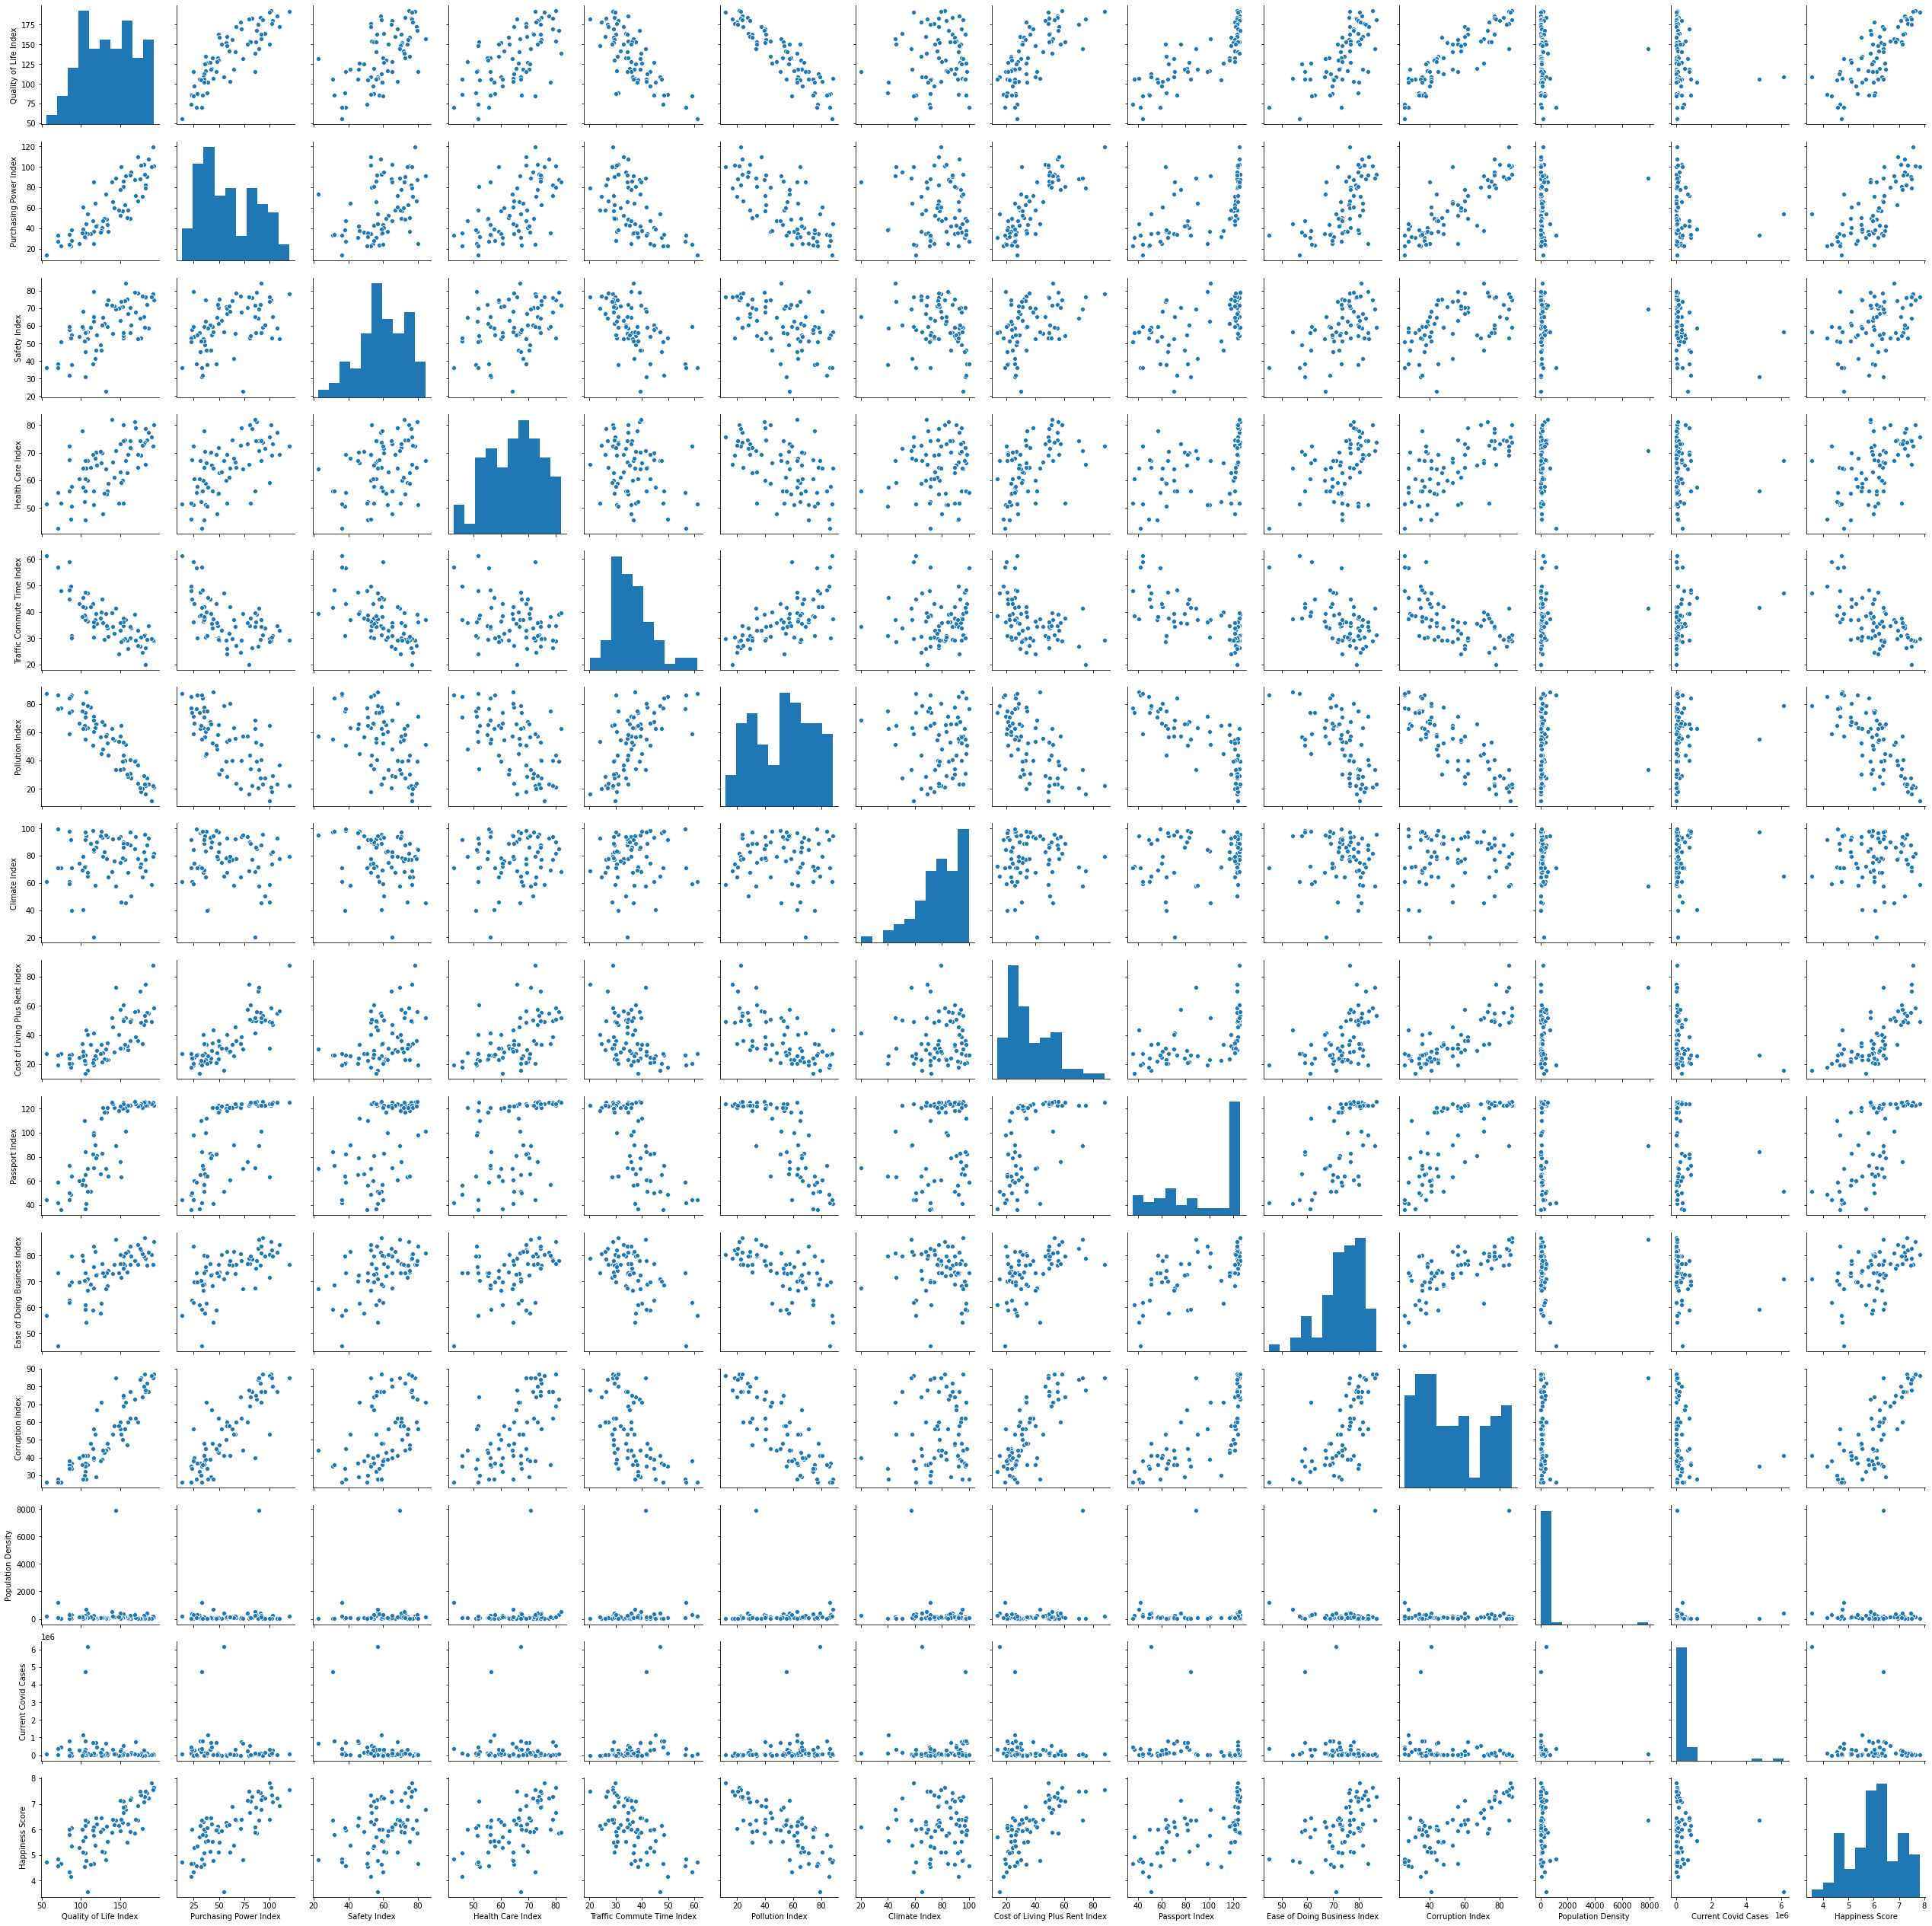

In [19]:
# without regression
sns.pairplot(data, kind="scatter")
plt.show()

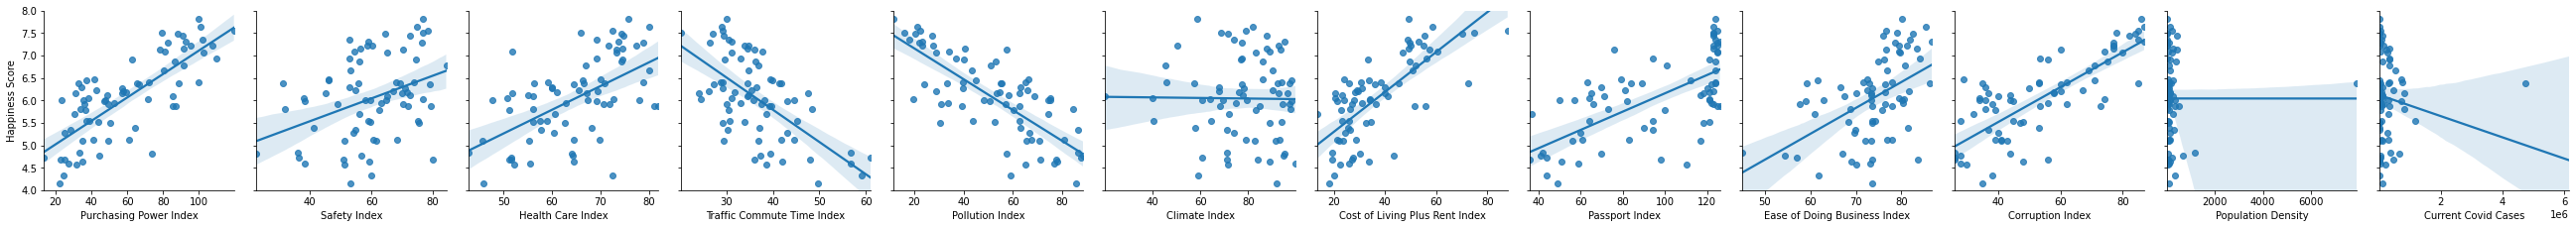

In [35]:
# consider only relationships from all the indices and happiness score
graph = sns.PairGrid(data, y_vars=['Happiness Score'], 
                     x_vars=['Purchasing Power Index','Safety Index', 'Health Care Index',
                             'Traffic Commute Time Index','Pollution Index','Climate Index',
                             'Cost of Living Plus Rent Index','Passport Index','Ease of Doing Business Index',
                             'Corruption Index','Population Density','Current Covid Cases'], height=3)
graph.map(sns.regplot)
graph.set(ylim=(4,8))

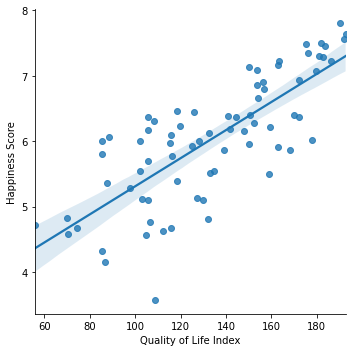

In [79]:
quality = sns.lmplot(
    data=data,
    x="Quality of Life Index", y="Happiness Score",
    height=5
)

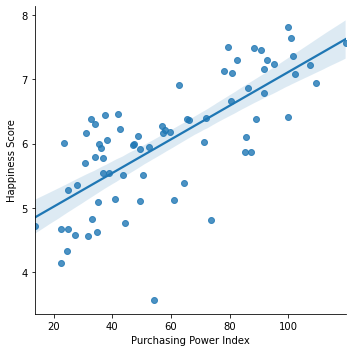

In [80]:
purchase = sns.lmplot(
    data=data,
    x="Purchasing Power Index", y="Happiness Score",
    height=5
)

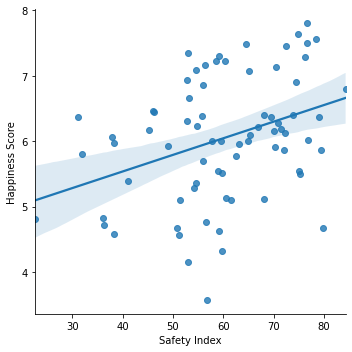

In [81]:
safety = sns.lmplot(
    data=data,
    x="Safety Index", y="Happiness Score",
    height=5
)

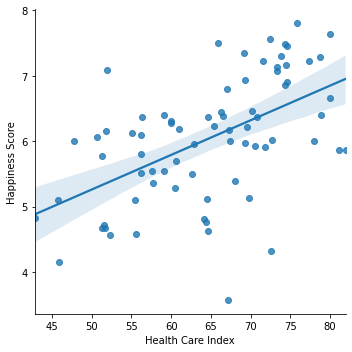

In [82]:
health = sns.lmplot(
    data=data,
    x="Health Care Index", y="Happiness Score",
    height=5
)

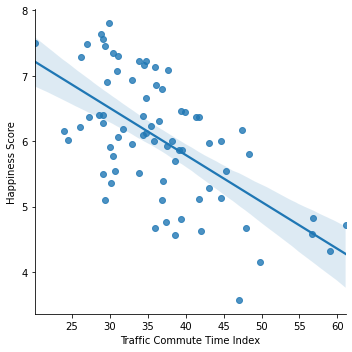

In [83]:
traffic = sns.lmplot(
    data=data,
    x="Traffic Commute Time Index", y="Happiness Score",
    height=5
)

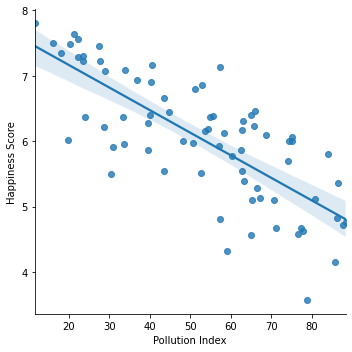

In [60]:
pollution = sns.lmplot(
    data=data,
    x="Pollution Index", y="Happiness Score",
    height=5
)

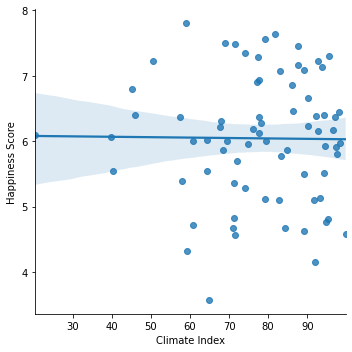

In [84]:
climate = sns.lmplot(
    data=data,
    x="Climate Index", y="Happiness Score",
    height=5
)

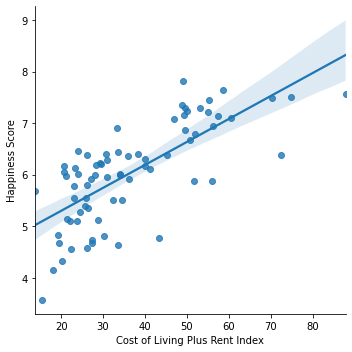

In [85]:
cost = sns.lmplot(
    data=data,
    x="Cost of Living Plus Rent Index", y="Happiness Score",
    height=5
)

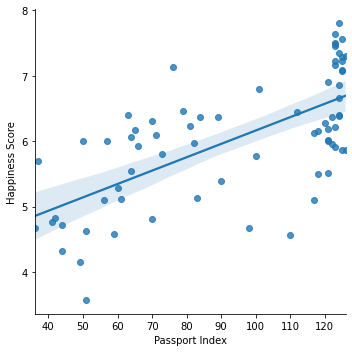

In [64]:
passport = sns.lmplot(
    data=data,
    x="Passport Index", y="Happiness Score",
    height=5
)

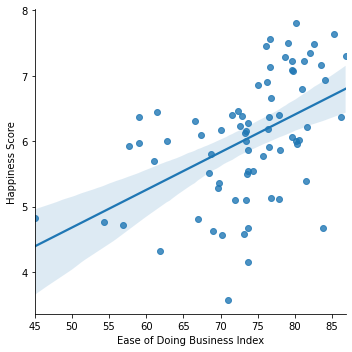

In [86]:
business = sns.lmplot(
    data=data,
    x="Ease of Doing Business Index", y="Happiness Score",
    height=5
)

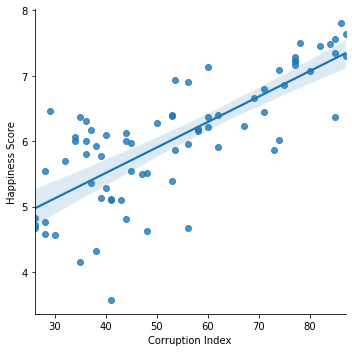

In [87]:
corruption = sns.lmplot(
    data=data,
    x="Corruption Index", y="Happiness Score",
    height=5
)

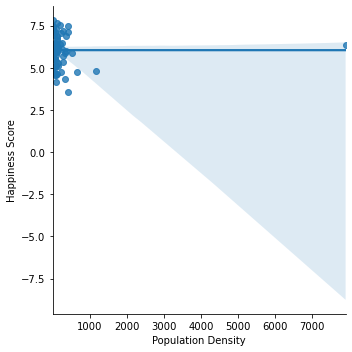

In [88]:
population = sns.lmplot(
    data=data,
    x="Population Density", y="Happiness Score",
    height=5
)

In [90]:
# check which country the outsider is
data[data['Population Density']>3000]

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
33,Singapore,144.39,88.96,69.43,70.84,41.31,33.48,57.45,72.58,89.0,86.2,85.0,7894.0,57715.0,6.3771


In [95]:
# eliminate the outlier
population_no_outlier = data.drop([33])

In [97]:
# check for successfull dropping of outlier
population_no_outlier[population_no_outlier['Population Density']>3000]

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score


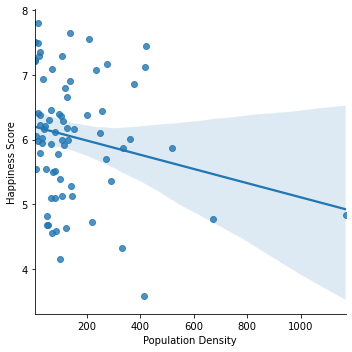

In [99]:
population2 = sns.lmplot(
    data=population_no_outlier,
    x="Population Density", y="Happiness Score",
    height=5
)

In [121]:
# check which country the outsider is
data[data['Population Density']>500]

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
33,Singapore,144.39,88.96,69.43,70.84,41.31,33.48,57.45,72.58,89.0,86.200000,85.000000,7894.0,57715.000000,6.3771
37,South Korea,139.02,85.21,71.98,81.97,39.57,62.48,68.39,51.72,125.0,73.665217,53.555556,517.0,336558.231884,5.8724
59,Lebanon,106.56,44.47,56.64,64.38,37.38,88.37,94.74,43.30,41.0,54.300000,28.000000,672.0,37272.000000,4.7715
78,Bangladesh,70.03,33.21,36.06,42.80,56.73,86.21,71.29,19.22,42.0,45.000000,26.000000,1169.0,360555.000000,4.8328


In [123]:
# eliminate those outliers
population_no_outlier_2 = data.drop([33, 37, 59, 78])

In [124]:
# check for successfull dropping of outlier
population_no_outlier_2[population_no_outlier_2['Population Density']>500]

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score


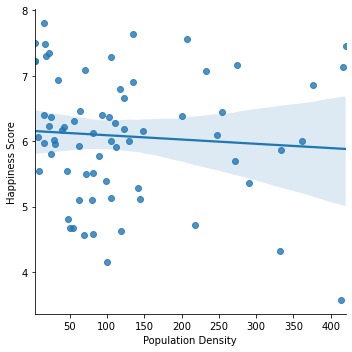

In [125]:
population3 = sns.lmplot(
    data=population_no_outlier_2,
    x="Population Density", y="Happiness Score",
    height=5
)

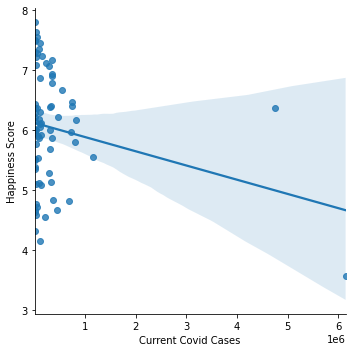

In [89]:
covid = sns.lmplot(
    data=data,
    x="Current Covid Cases", y="Happiness Score",
    height=5
)

In [94]:
# check which countries are the outliers
data[data['Current Covid Cases']>3000000]

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
57,India,108.63,54.30,56.68,67.13,46.99,78.87,64.87,15.54,51.0,71.0,41.0,414.0,6145291.0,3.5733
61,Brazil,105.65,32.81,31.12,56.29,41.70,54.98,97.16,26.08,84.0,59.1,35.0,25.0,4748327.0,6.3756


In [100]:
# drop the outliers
covid_no_outlier = data.drop([57, 61])

In [101]:
# check for successful drop of outliers
covid_no_outlier[covid_no_outlier['Current Covid Cases']>3000000]

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score


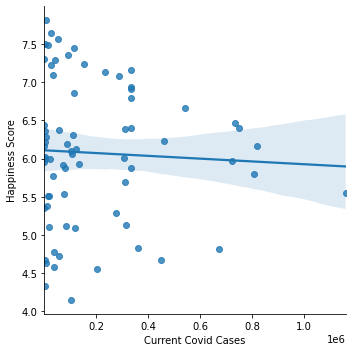

In [102]:
covid2 = sns.lmplot(
    data=covid_no_outlier,
    x="Current Covid Cases", y="Happiness Score",
    height=5
)

In [66]:
# extract relevant columns to build a simple linear regression between Quality of Life Index and Happiness Score
df_1 = data[['Quality of Life Index', 'Happiness Score']]
df_1

,Quality of Life Index,Happiness Score
0,192.67,7.6456
1,192.01,7.5599
2,190.22,7.8087
3,186.21,7.2228
4,183.67,7.4489
...,...,...
75,85.16,4.3270
76,74.14,4.6724
77,70.56,4.5830
78,70.03,4.8328


In [67]:
# add a constant
df_1 = sm.add_constant(df_1)
df_1

,const,Quality of Life Index,Happiness Score
0,1.0,192.67,7.6456
1,1.0,192.01,7.5599
2,1.0,190.22,7.8087
3,1.0,186.21,7.2228
4,1.0,183.67,7.4489
...,...,...,...
75,1.0,85.16,4.3270
76,1.0,74.14,4.6724
77,1.0,70.56,4.5830
78,1.0,70.03,4.8328


In [68]:
# fit the model
regression_1 = sm.OLS(df_1["Happiness Score"], df_1[["const", "Quality of Life Index"]]).fit()

# Print out the statistics
regression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     110.1
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.71e-16
Time:                        16:51:26   Log-Likelihood:                -66.616
No. Observations:                  74   AIC:                             137.2
Df Residuals:                      72   BIC:                             141.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.1643      0.283     11.173      0.000       2.600       3.729
Quality of Life Index     0.0215      0.002     10.493      0.000       0.017       0.026
==============================================================================
Omnibus:                        5.685   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.287
Skew:                          -0.652   Prob(JB):                       0.0711
Kurtosis:                       3.110   Cond. No.                         559.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Result Interpretation**

R^2 ist 0.6 --> 60% of the variation of Happiness is explained by Quality of Life

p < alpha --> statistically significant relationship between Happiness and Quality of Life

In [69]:
# add regression line
df_1 = df_1.assign(y_hat_1 = regression_1.predict(df_1[["const", "Quality of Life Index"]]))
df_1

,const,Quality of Life Index,Happiness Score,y_hat_1
0,1.0,192.67,7.6456,7.300840
1,1.0,192.01,7.5599,7.286670
2,1.0,190.22,7.8087,7.248240
3,1.0,186.21,7.2228,7.162148
4,1.0,183.67,7.4489,7.107616
...,...,...,...,...
75,1.0,85.16,4.3270,4.992669
76,1.0,74.14,4.6724,4.756077
77,1.0,70.56,4.5830,4.679217
78,1.0,70.03,4.8328,4.667838


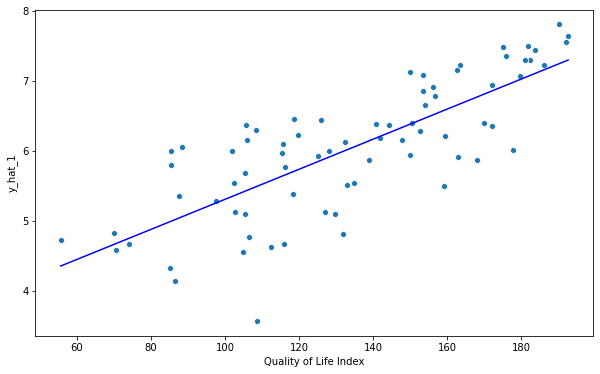

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_1,
                x="Quality of Life Index",
                y="Happiness Score",
                ax=ax);

sns.lineplot(data=df_1,
             x="Quality of Life Index",
             y="y_hat_1",
             color="blue",
             ax=ax);

We can see that Quality of Life index is correlated with Happiness Score. In Quality of Life Index, however, are several indices included, e.g. Purchase Power, Safety, Climate, Health care, Cost of Living, Pollution and Traffic Commute Time Index. For that reason, I will exclude the Quality of Life Index in my multiple linear regression model. Instead, I will only use its subindices and a few other features to build a multiple linear regression: Purchase Power Index, Pollution Index, Corruption Index Passport Index, Healthcare Index, Cost of Living Plus Rent Index and Ease of Doing Business Index.

Beforehand, I will build a simple linear regression for a few features that indicates a strong relationship: Purchase Power, Pollution and Corruption Index.

In [25]:
# building simple linear regression for Purchasing Power Index and Happiness Score
X_2 = data["Purchasing Power Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_2 = sm.add_constant(X_2) # add an intercept to our model

model_2 = sm.OLS(y, X_2).fit() # sm.OLS(output, input)

# Print out the statistics
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     88.54
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           3.62e-14
Time:                        19:52:23   Log-Likelihood:                -71.279
No. Observations:                  74   AIC:                             146.6
Df Residuals:                      72   BIC:                             151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.4967      0.181     24.903      0.000       4.137       4.857
Purchasing Power Index     0.0261      0.003      9.410      0.000       0.021       0.032
==============================================================================
Omnibus:                       12.159   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.080
Skew:                          -0.845   Prob(JB):                      0.00144
Kurtosis:                       4.177   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

55% of variation is explained by the model and p-value is smaller than alpha, so the model is statistically significant.

In [71]:
# building simple linear regression for Pollution Index and Happiness Score
X_3 = data["Pollution Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_3 = sm.add_constant(X_3) # add an intercept to our model

model_3 = sm.OLS(y, X_3).fit() # sm.OLS(output, input)

# Print out the statistics
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     99.94
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.99e-15
Time:                        16:52:22   Log-Likelihood:                -68.741
No. Observations:                  74   AIC:                             141.5
Df Residuals:                      72   BIC:                             146.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.8554      0.195     40.266      0.000       7.466       8.244
Pollution Index    -0.0345      0.003     -9.997      0.000      -0.041      -0.028
==============================================================================
Omnibus:                        3.862   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.827
Skew:                          -0.532   Prob(JB):                        0.148
Kurtosis:                       2.669   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

58% of variation is explained by the model and p-value is smaller than alpha, so the model is statistically significant.

In [78]:
# building simple linear regression for Corruption Index and Happiness Score
X_4 = data["Corruption Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_4 = sm.add_constant(X_4) # add an intercept to our model

model_4 = sm.OLS(y, X_4).fit() # sm.OLS(output, input)

# Print out the statistics
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.82e-15
Time:                        16:59:27   Log-Likelihood:                -68.238
No. Observations:                  74   AIC:                             140.5
Df Residuals:                      72   BIC:                             145.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.9592      0.218     18.144      0.000       3.524       4.394
Corruption Index     0.0389      0.004     10.114      0.000       0.031       0.047
==============================================================================
Omnibus:                        6.727   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                5.987
Skew:                          -0.608   Prob(JB):                       0.0501
Kurtosis:                       3.679   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# building simple linear regression for Safety Index and Happiness Score
X_5 = data["Safety Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_5 = sm.add_constant(X_5) # add an intercept to our model

model_5 = sm.OLS(y, X_5).fit() # sm.OLS(output, input)

# Print out the statistics
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     10.43
Date:                Wed, 07 Oct 2020   Prob (F-statistic):            0.00187
Time:                        17:56:53   Log-Likelihood:                -95.945
No. Observations:                  74   AIC:                             195.9
Df Residuals:                      72   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5213      0.483      9.365      0.000       3.559       5.484
Safety Index     0.0254      0.008      3.229      0.002       0.010       0.041
==============================================================================
Omnibus:                        2.108   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.985
Skew:                          -0.313   Prob(JB):                        0.371
Kurtosis:                       2.499   Cond. No.                         284.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# building simple linear regression for Health Care Index and Happiness Score
X_6 = data["Health Care Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_6 = sm.add_constant(X_6) # add an intercept to our model

model_6 = sm.OLS(y, X_6).fit() # sm.OLS(output, input)

# Print out the statistics
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     29.13
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           8.26e-07
Time:                        17:59:38   Log-Likelihood:                -88.379
No. Observations:                  74   AIC:                             180.8
Df Residuals:                      72   BIC:                             185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6153      0.642      4.073      0.000       1.335       3.895
Health Care Index     0.0529      0.010      5.397      0.000       0.033       0.072
==============================================================================
Omnibus:                        6.215   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.425
Skew:                          -0.608   Prob(JB):                       0.0664
Kurtosis:                       3.528   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# building simple linear regression for Traffic Commute Time Index and Happiness Score
X_7 = data["Traffic Commute Time Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_7 = sm.add_constant(X_7) # add an intercept to our model

model_7 = sm.OLS(y, X_7).fit() # sm.OLS(output, input)

# Print out the statistics
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.27e-09
Time:                        18:00:35   Log-Likelihood:                -83.103
No. Observations:                  74   AIC:                             170.2
Df Residuals:                      72   BIC:                             174.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.6615      0.402     21.569      0.000       7.861       9.462
Traffic Commute Time Index    -0.0718      0.011     -6.681      0.000      -0.093      -0.050
==============================================================================
Omnibus:                        6.827   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                3.351
Skew:                          -0.272   Prob(JB):                        0.187
Kurtosis:                       2.111   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# building simple linear regression for Climate Index and Happiness Score
X_8 = data["Climate Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_8 = sm.add_constant(X_8) # add an intercept to our model

model_8 = sm.OLS(y, X_8).fit() # sm.OLS(output, input)

# Print out the statistics
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                  0.008480
Date:                Wed, 07 Oct 2020   Prob (F-statistic):              0.927
Time:                        18:01:12   Log-Likelihood:                -100.95
No. Observations:                  74   AIC:                             205.9
Df Residuals:                      72   BIC:                             210.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.0927      0.545     11.186      0.000       5.007       7.178
Climate Index    -0.0006      0.007     -0.092      0.927      -0.014       0.013
==============================================================================
Omnibus:                        1.642   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.523
Skew:                          -0.235   Prob(JB):                        0.467
Kurtosis:                       2.477   Cond. No.                         388.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# building simple linear regression for Cost of Living Plus Rent Index and Happiness Score
X_9 = data["Cost of Living Plus Rent Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_9 = sm.add_constant(X_9) # add an intercept to our model

model_9 = sm.OLS(y, X_9).fit() # sm.OLS(output, input)

# Print out the statistics
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     82.19
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.57e-13
Time:                        18:01:52   Log-Likelihood:                -72.772
No. Observations:                  74   AIC:                             149.5
Df Residuals:                      72   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.4091      0.196     22.526      0.000       4.019       4.799
Cost of Living Plus Rent Index     0.0445      0.005      9.066      0.000       0.035       0.054
==============================================================================
Omnibus:                        4.612   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.465
Skew:                          -0.551   Prob(JB):                        0.107
Kurtosis:                       2.517   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# building simple linear regression for Passport Index and Happiness Score
X_10 = data["Passport Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_10 = sm.add_constant(X_10) # add an intercept to our model

model_10 = sm.OLS(y, X_10).fit() # sm.OLS(output, input)

# Print out the statistics
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     53.21
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.16e-10
Time:                        18:02:39   Log-Likelihood:                -80.478
No. Observations:                  74   AIC:                             165.0
Df Residuals:                      72   BIC:                             169.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1146      0.278     14.819      0.000       3.561       4.668
Passport Index     0.0204      0.003      7.294      0.000       0.015       0.026
==============================================================================
Omnibus:                        2.907   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.320
Skew:                          -0.298   Prob(JB):                        0.313
Kurtosis:                       2.370   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# building simple linear regression for Ease of Doing Business Index and Happiness Score
X_11 = data["Ease of Doing Business Index"] # input variables / independent variable 
y = data["Happiness Score"] # output / dependent variable
X_11 = sm.add_constant(X_11) # add an intercept to our model

model_11 = sm.OLS(y, X_11).fit() # sm.OLS(output, input)

# Print out the statistics
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     21.99
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.27e-05
Time:                        18:03:20   Log-Likelihood:                -91.087
No. Observations:                  74   AIC:                             186.2
Df Residuals:                      72   BIC:                             190.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7961      0.911      1.972      0.052      -0.020       3.612
Ease of Doing Business Index     0.0577      0.012      4.690      0.000       0.033       0.082
==============================================================================
Omnibus:                        4.212   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.109
Skew:                          -0.570   Prob(JB):                        0.128
Kurtosis:                       2.813   Cond. No.                         691.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# building simple linear regression for Population Density and Happiness Score
X_12 = population_no_outlier["Population Density"] # input variables / independent variable 
y = population_no_outlier["Happiness Score"] # output / dependent variable
X_12 = sm.add_constant(X_12) # add an intercept to our model

model_12 = sm.OLS(y, X_12).fit() # sm.OLS(output, input)

# Print out the statistics
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.186
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0785
Time:                        18:04:40   Log-Likelihood:                -98.418
No. Observations:                  73   AIC:                             200.8
Df Residuals:                      71   BIC:                             205.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.2027      0.144     43.175      0.000       5.916       6.489
Population Density    -0.0011      0.001     -1.785      0.079      -0.002       0.000
==============================================================================
Omnibus:                        1.872   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.469
Skew:                          -0.160   Prob(JB):                        0.480
Kurtosis:                       2.383   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# building simple linear regression for Current Covid Cases and Happiness Score
X_13 = covid_no_outlier["Current Covid Cases"] # input variables / independent variable 
y = covid_no_outlier["Happiness Score"] # output / dependent variable
X_13 = sm.add_constant(X_13) # add an intercept to our model

model_13 = sm.OLS(y, X_13).fit() # sm.OLS(output, input)

# Print out the statistics
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1707
Date:                Wed, 07 Oct 2020   Prob (F-statistic):              0.681
Time:                        18:05:46   Log-Likelihood:                -95.541
No. Observations:                  72   AIC:                             195.1
Df Residuals:                      70   BIC:                             199.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1088      0.139     43.991      0.000       5.832       6.386
Current Covid Cases -1.826e-07   4.42e-07     -0.413      0.681   -1.06e-06    6.99e-07
==============================================================================
Omnibus:                        4.167   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.173
Skew:                          -0.130   Prob(JB):                        0.337
Kurtosis:                       2.190   Cond. No.                     4.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

58% of variation is explained by the model and p-value is smaller than alpha, so the model is statistically significant.

In the following. I'll build multiple linear regression with Purchase Power Index, Pollution Index, Corruption Index, Passport Index, Healthcare Index, Cost of Living Plus Rent Index and Ease of Doing Business Index. Before doing so, I'll check whether these indices have missing values. I yes, those rows will be added with the mean of the columns.

In [73]:
# check NaN
data.isna().sum()

Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Cost of Living Plus Rent Index    0
Passport Index                    3
Ease of Doing Business Index      5
Corruption Index                  2
Population Density                1
Current Covid Cases               5
Happiness Score                   0
dtype: int64

- Passport Index has 3 NaN
- Ease of Doing Business Index has 5 NaN
- Corruption Index has 2 NaN

If I drop them, there might be up to 10 rows I will loose. Given the already limited rows, I will compute the mean and fill NaN with the mean.

In [74]:
# fill missing values with mean column values
data = data.fillna(data.mean())
data

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Plus Rent Index,Passport Index,Ease of Doing Business Index,Corruption Index,Population Density,Current Covid Cases,Happiness Score
0,Denmark,192.67,100.88,74.90,80.00,28.85,21.33,81.80,58.57,123.0,85.300000,87.0,135.0,27072.0,7.6456
1,Switzerland,192.01,119.53,78.40,72.44,29.09,22.39,79.24,87.89,125.0,76.600000,85.0,208.0,52646.0,7.5599
2,Finland,190.22,99.93,76.68,75.79,29.90,11.55,58.87,49.18,124.0,80.200000,86.0,16.0,9743.0,7.8087
3,Australia,186.21,107.31,58.64,77.38,34.73,23.46,92.70,55.04,125.0,81.200000,77.0,3.0,27055.0,7.2228
4,Netherlands,183.67,90.73,72.38,74.65,29.43,27.41,87.61,55.30,123.0,76.100000,82.0,420.0,114540.0,7.4489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Sri Lanka,85.16,24.45,59.78,72.53,59.01,59.14,59.11,20.20,44.0,61.800000,38.0,332.0,3363.0,4.3270
76,Iran,74.14,22.69,50.75,51.70,48.01,77.45,70.99,27.28,36.0,73.665217,26.0,51.0,449960.0,4.6724
77,Kenya,70.56,27.32,38.34,55.59,56.65,76.60,99.79,26.11,59.0,73.200000,28.0,82.0,38168.0,4.5830
78,Bangladesh,70.03,33.21,36.06,42.80,56.73,86.21,71.29,19.22,42.0,45.000000,26.0,1169.0,360555.0,4.8328


In [75]:
# check whether NaN are successfully replaced
data.isna().sum()

Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Cost of Living Plus Rent Index    0
Passport Index                    0
Ease of Doing Business Index      0
Corruption Index                  0
Population Density                0
Current Covid Cases               0
Happiness Score                   0
dtype: int64

In [76]:
# build 
X = data[['Purchasing Power Index', 'Pollution Index', 'Corruption Index', 'Passport Index', 'Health Care Index',
         'Cost of Living Plus Rent Index', 'Ease of Doing Business Index']]
y = data['Happiness Score']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              920.9
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                    5.57e-64
Time:                        16:52:42   Log-Likelihood:                         -69.676
No. Observations:                  74   AIC:                                      153.4
Df Residuals:                      67   BIC:                                      169.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Purchasing Power Index             0.0025      0.006      0.430      0.669      -0.009       0.014
Pollution Index                    0.0078      0.006      1.411      0.163      -0.003       0.019
Corruption Index                   0.0085      0.010      0.831      0.409      -0.012       0.029
Passport Index                     0.0092      0.004      2.266      0.027       0.001       0.017
Health Care Index                  0.0260      0.009      2.878      0.005       0.008       0.044
Cost of Living Plus Rent Index     0.0185      0.009      2.066      0.043       0.001       0.036
Ease of Doing Business Index       0.0242      0.011      2.262      0.027       0.003       0.046
==============================================================================
Omnibus:                        2.225   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.873
Skew:                          -0.390   Prob(JB):                        0.392
Kurtosis:                       3.009   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model I built above explains 99% of variation of happiness. However, only the p-value of Health Care Index is smaller than alpha, and therefore is statistically significant.